# <center><h3>Complex Network Project</h3></center>

In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch
plt.style.use("ggplot")

# Pre-Processing

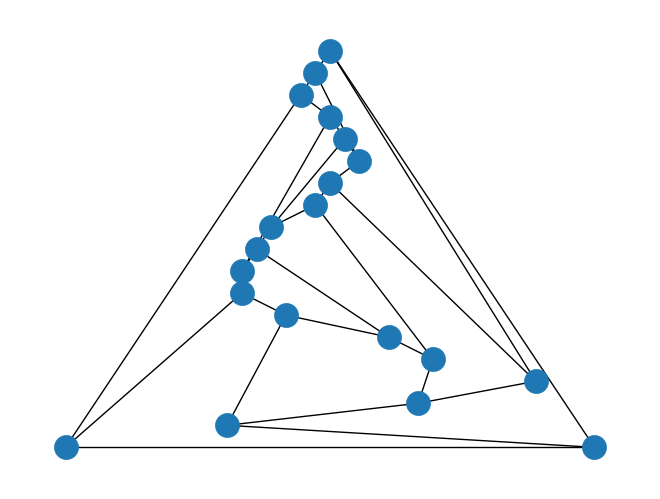

In [45]:
# G = nx.dodecahedral_graph()
# # nx.draw(G)
# nx.draw(G, pos=nx.planar_layout(G))
# plt.show()

In [46]:
G = nx.DiGraph()

department_labels = 'email-Eu-core-department-labels.txt'
email = 'email-Eu-core.txt'

department_labels_csv = pd.read_csv(department_labels, sep=',')
email_csv = pd.read_csv(email, sep=',')

department_labels_csv.head()
email_csv.head()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [47]:
i = 0
dep_color = []
for name in mcolors.CSS4_COLORS:
    i+=1
    if(i == 43):
        break
    dep_color.append(name)
# print(len(dep_color))
# for i in dep_color:
#     print(i)

color_map = []
for i in range(len(department_labels_csv)):
    color_map.append(dep_color[department_labels_csv['dep'][i]])
    # print(color_map[i])

print((len(color_map)))


1005


In [48]:
# G.add_nodes_from()
G.add_edges_from(email_csv.to_numpy())


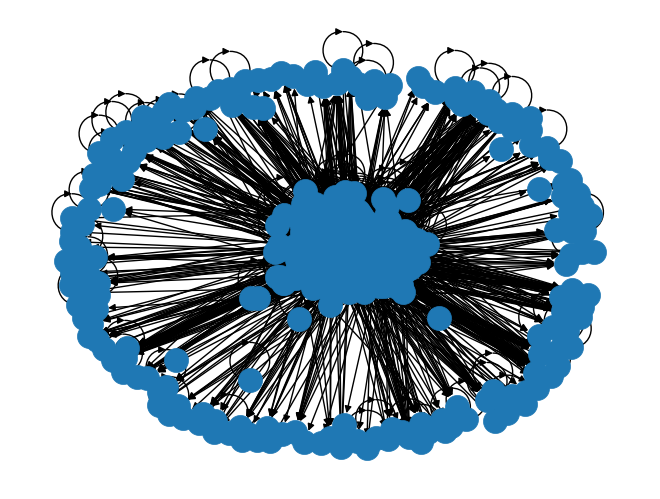

In [51]:
# nx.draw(G, node_color=color_map)
nx.draw(G, pos=nx.spring_layout(G))
# nx.draw(G, pos=nx.kamada_kawai_layout(G))
plt.show()

In [6]:
H = nx.DiGraph()

email_short = 'email-Eu-core.txt'

email_short_csv = pd.read_csv(email_short, sep=',')

email_short_csv.head()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [7]:
# G.add_nodes_from()
# H.add_edges_from(email_short_csv.to_numpy())
# nx.draw(H, node_color=color_map)
# plt.show()

In [8]:
undirected_G = nx.Graph()

undirected_G.add_edges_from(email_csv.to_numpy())
undirected_G.remove_edges_from(nx.selfloop_edges(undirected_G))
undirected_G.remove_nodes_from(list(nx.isolates(undirected_G)))
# nx.draw(undirected_G)
# plt.show()

# Degree Distribution

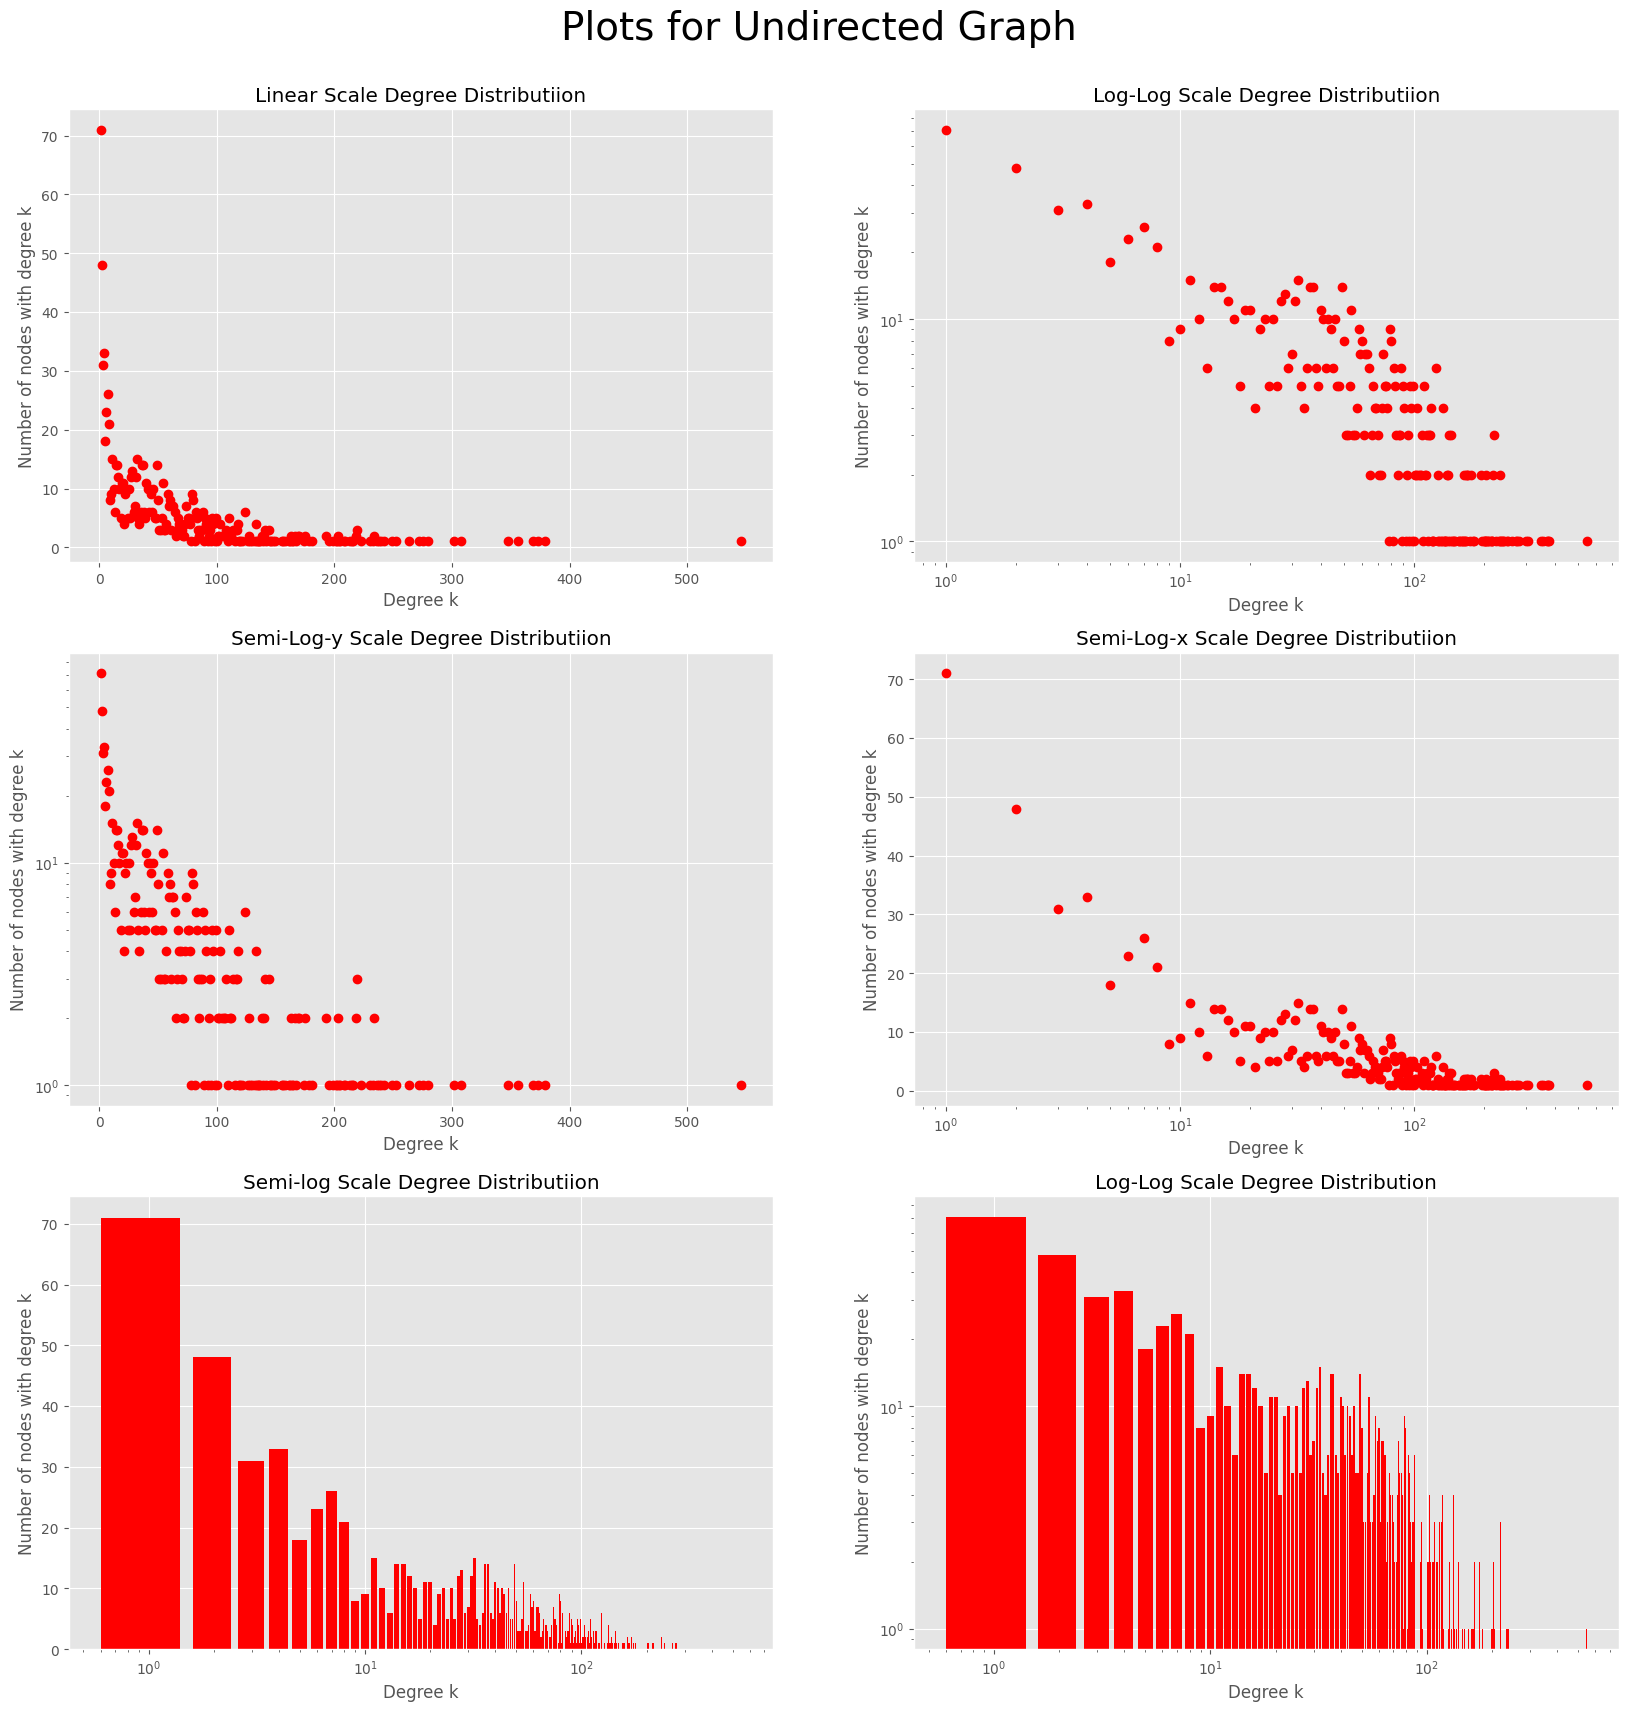

In [9]:
degree = np.array(G.degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)


fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle("Plots for Undirected Graph", y=0.93, fontsize=28)
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

ax[1, 0].semilogy(unique_elements, counts_elements, 'ro')
ax[1, 0].set_title("Semi-Log-y Scale Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")


ax[1, 1].semilogx(unique_elements, counts_elements, 'ro')
ax[1, 1].set_title("Semi-Log-x Scale Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

ax[2, 0].bar(unique_elements, counts_elements, color='r')
ax[2, 0].set_xscale('log')
ax[2, 0].set_title("Semi-log Scale Degree Distributiion")
ax[2, 0].set_xlabel("Degree k")
ax[2, 0].set_ylabel("Number of nodes with degree k")

ax[2, 1].bar(unique_elements, counts_elements, color='r', log=True)
ax[2, 1].set_xscale('log')
ax[2, 1].set_title("Log-Log Scale Degree Distribution")
ax[2, 1].set_xlabel("Degree k")
ax[2, 1].set_ylabel("Number of nodes with degree k")
plt.show()


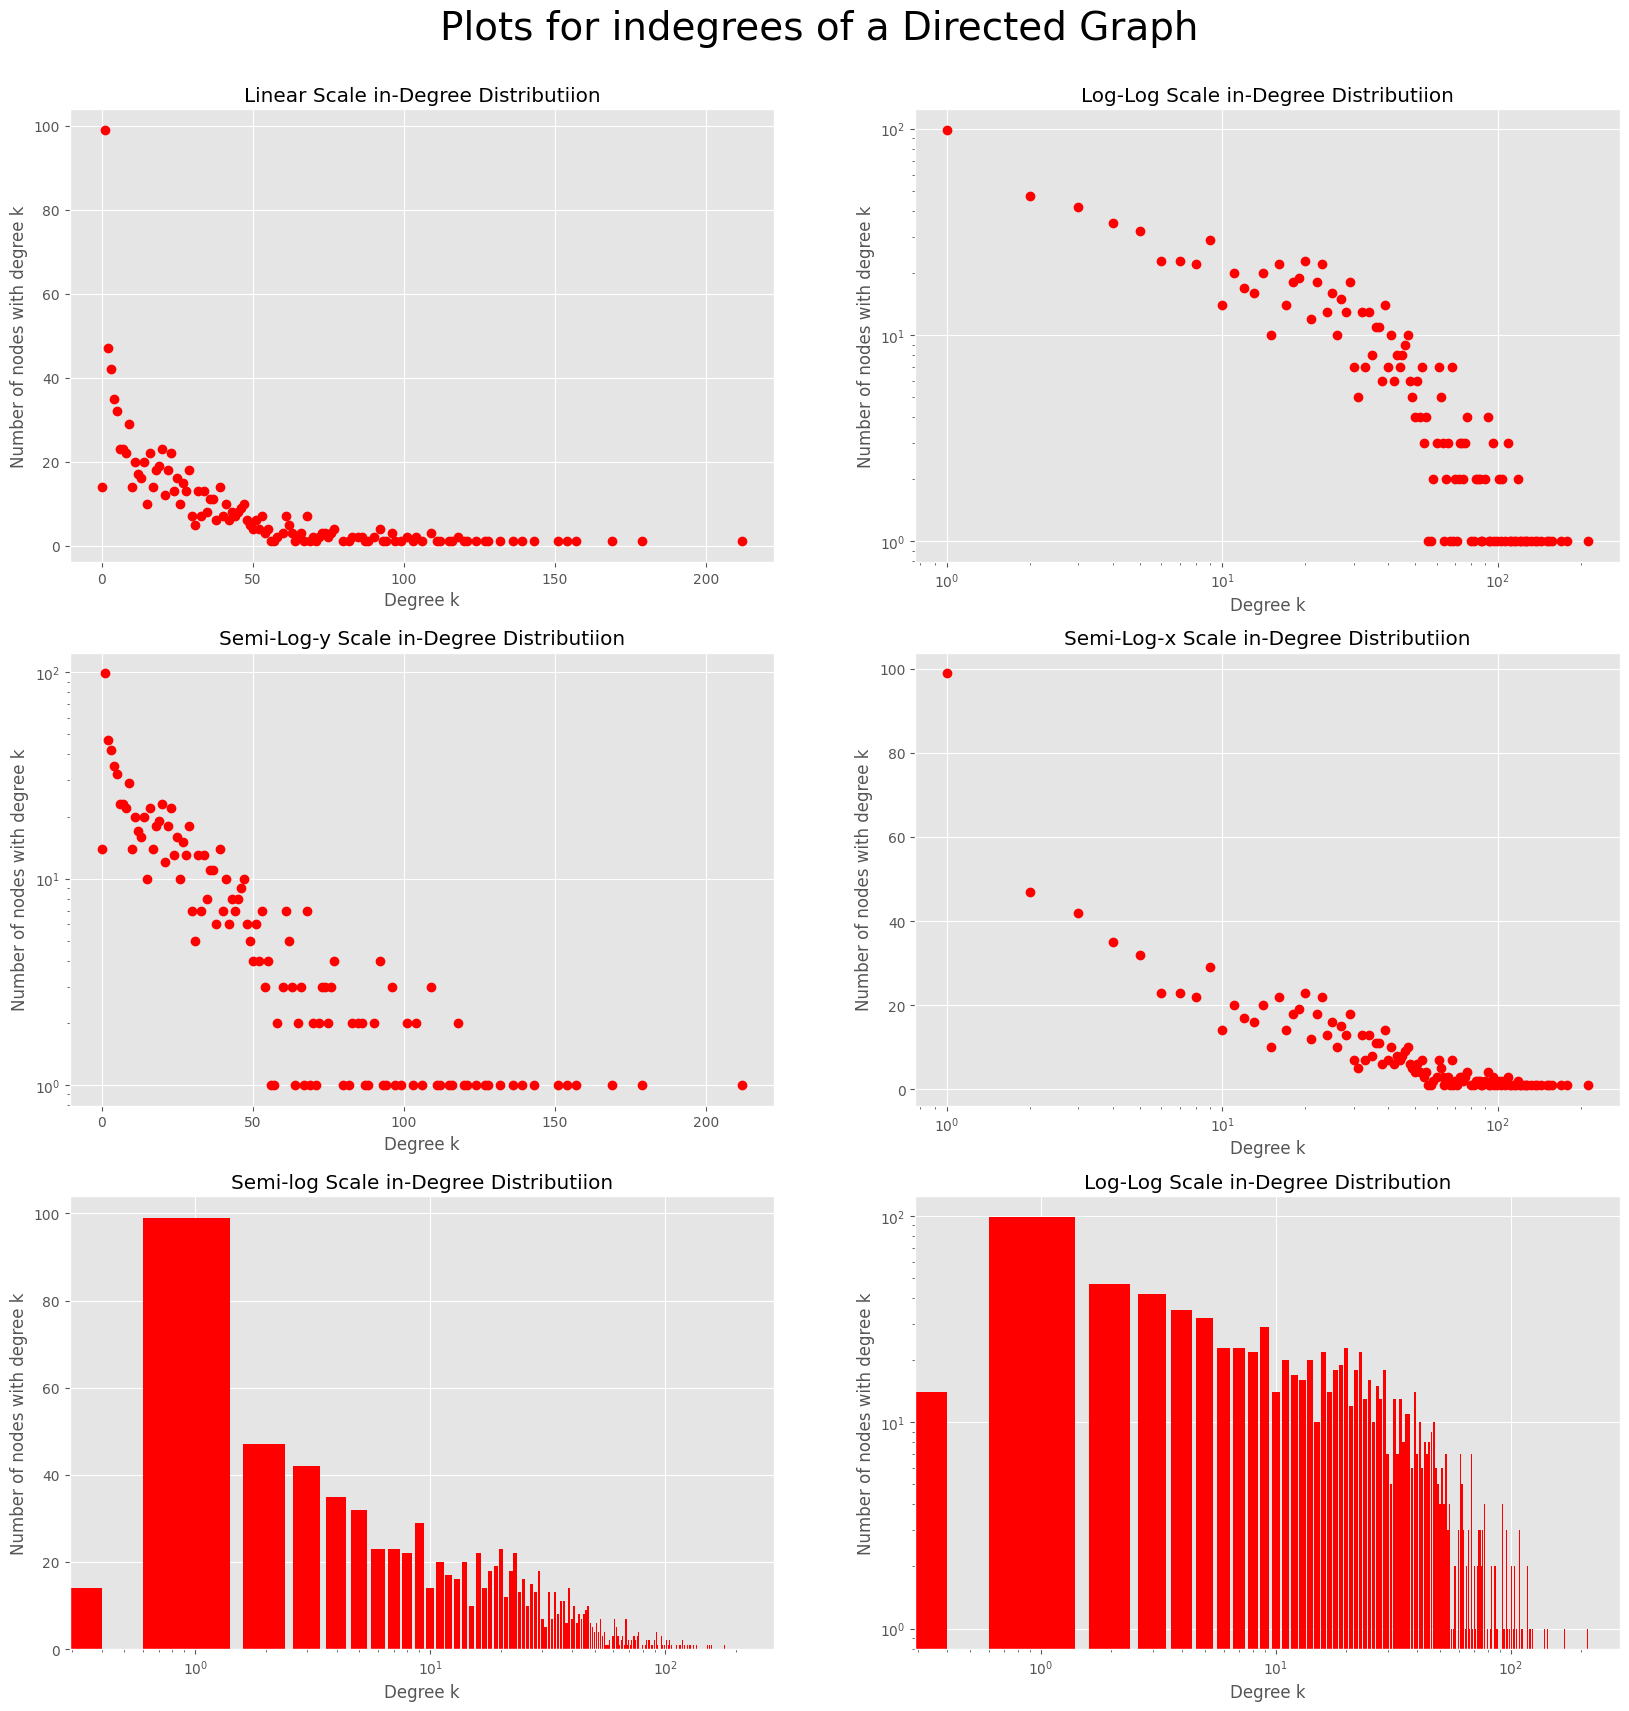

In [10]:
degree = np.array(G.in_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle("Plots for indegrees of a Directed Graph", y=0.93, fontsize=28)
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale in-Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale in-Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

ax[1, 0].semilogy(unique_elements, counts_elements, 'ro')
ax[1, 0].set_title("Semi-Log-y Scale in-Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")


ax[1, 1].semilogx(unique_elements, counts_elements, 'ro')
ax[1, 1].set_title("Semi-Log-x Scale in-Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

ax[2, 0].bar(unique_elements, counts_elements, color='r')
ax[2, 0].set_xscale('log')
ax[2, 0].set_title("Semi-log Scale in-Degree Distributiion")
ax[2, 0].set_xlabel("Degree k")
ax[2, 0].set_ylabel("Number of nodes with degree k")

ax[2, 1].bar(unique_elements, counts_elements, color='r', log=True)
ax[2, 1].set_xscale('log')
ax[2, 1].set_title("Log-Log Scale in-Degree Distribution")
ax[2, 1].set_xlabel("Degree k")
ax[2, 1].set_ylabel("Number of nodes with degree k")
plt.show()

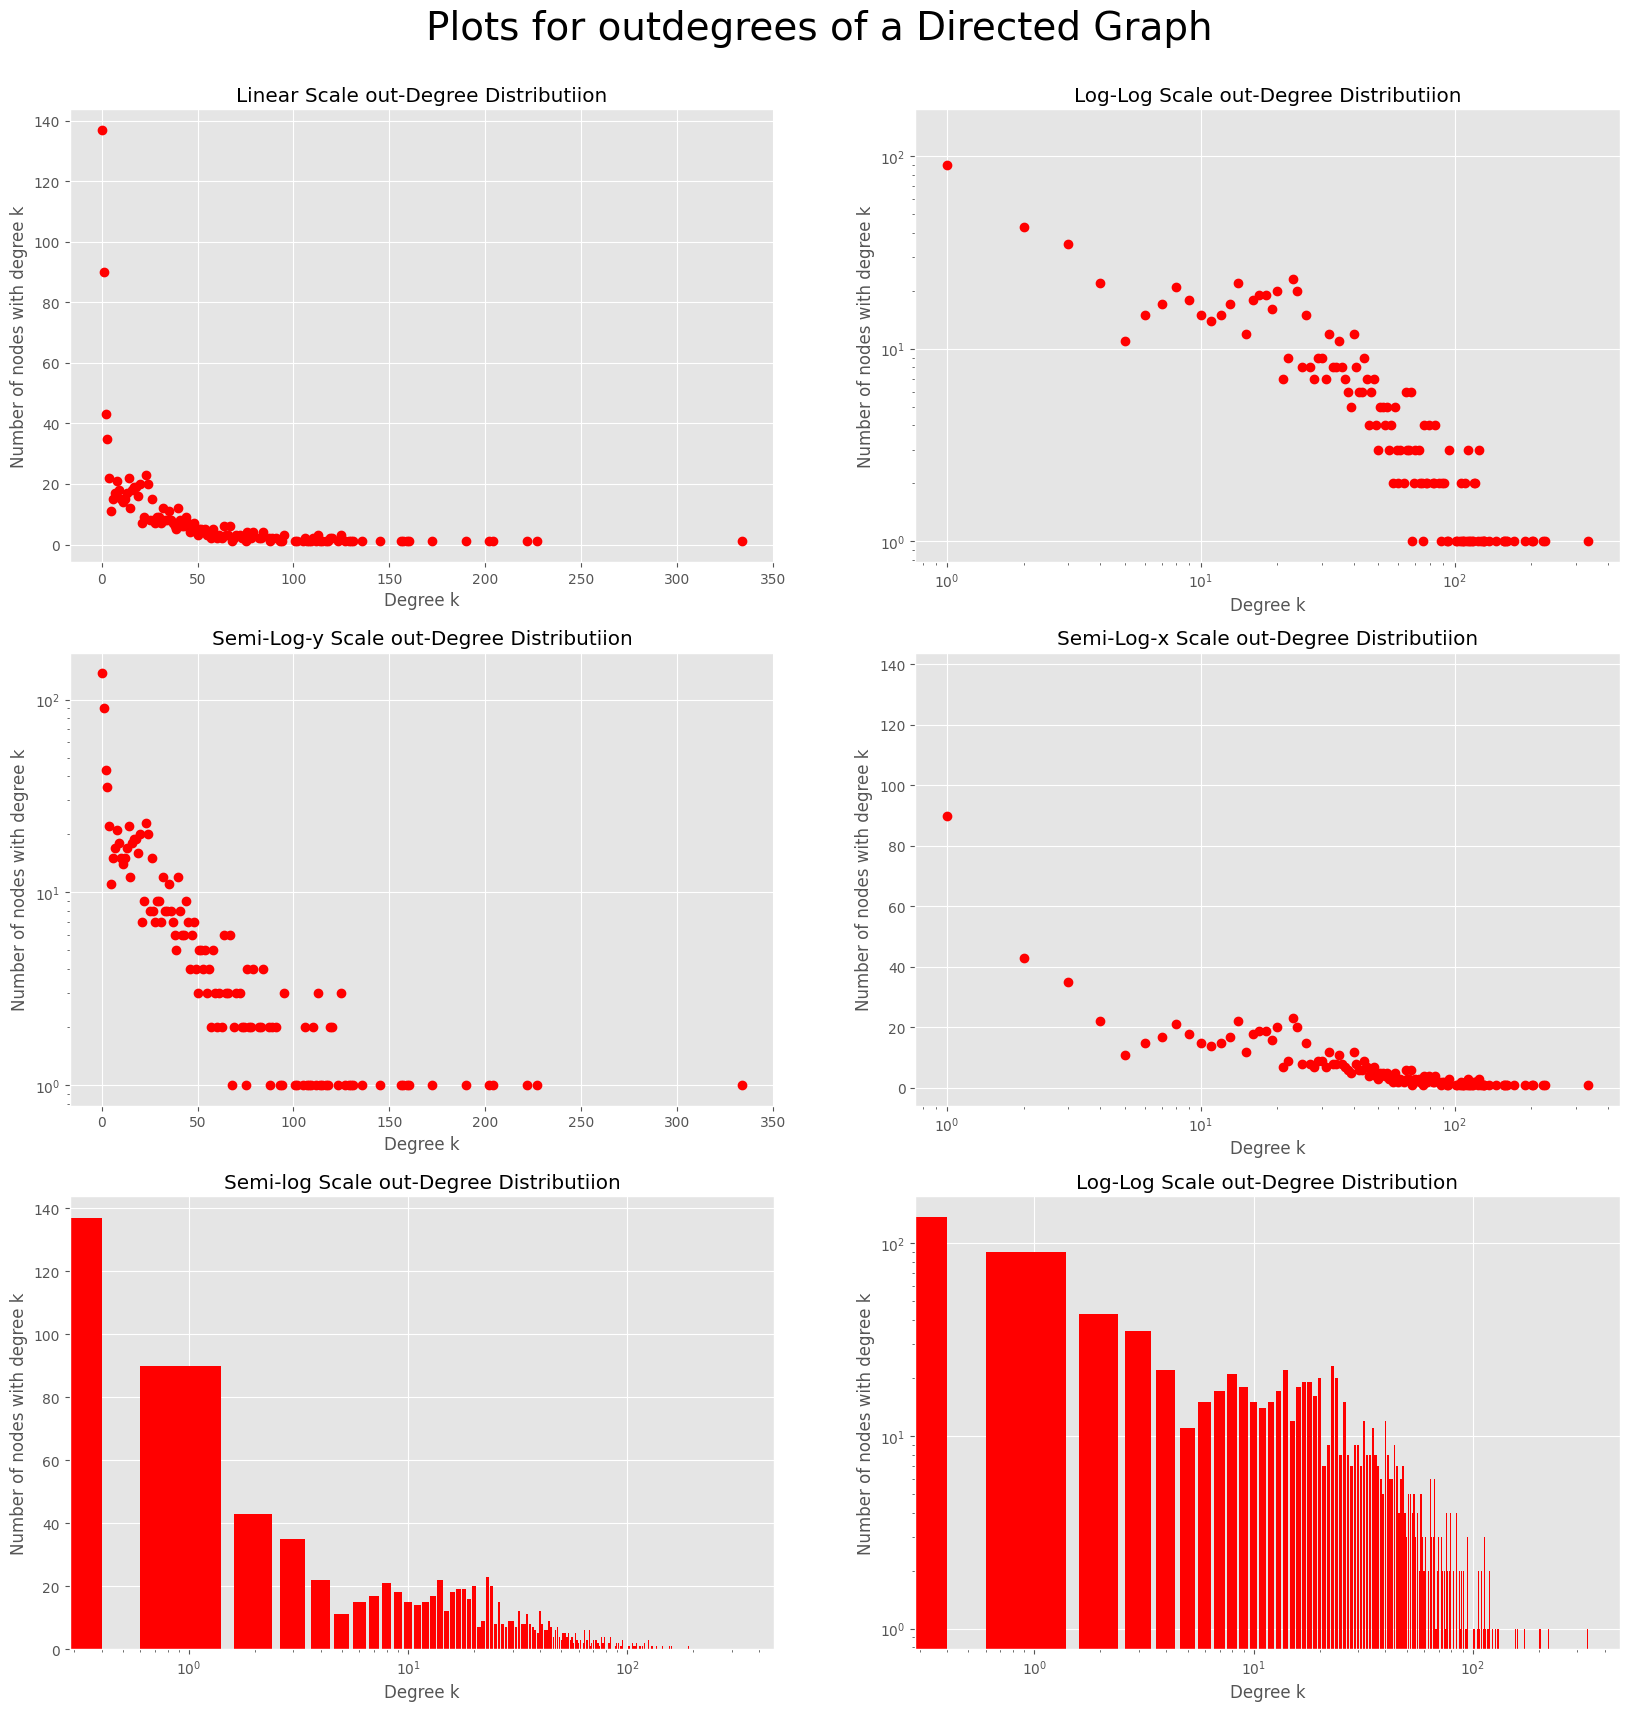

In [11]:
degree = np.array(G.out_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)

fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle("Plots for outdegrees of a Directed Graph", y=0.93, fontsize=28)
ax[0, 0].plot(unique_elements, counts_elements, 'ro')
ax[0, 0].set_title("Linear Scale out-Degree Distributiion")
ax[0, 0].set_xlabel("Degree k")
ax[0, 0].set_ylabel("Number of nodes with degree k")


ax[0, 1].loglog(unique_elements, counts_elements, 'ro')
ax[0, 1].set_title("Log-Log Scale out-Degree Distributiion")
ax[0, 1].set_xlabel("Degree k")
ax[0, 1].set_ylabel("Number of nodes with degree k")

ax[1, 0].semilogy(unique_elements, counts_elements, 'ro')
ax[1, 0].set_title("Semi-Log-y Scale out-Degree Distributiion")
ax[1, 0].set_xlabel("Degree k")
ax[1, 0].set_ylabel("Number of nodes with degree k")

ax[1, 1].semilogx(unique_elements, counts_elements, 'ro')
ax[1, 1].set_title("Semi-Log-x Scale out-Degree Distributiion")
ax[1, 1].set_xlabel("Degree k")
ax[1, 1].set_ylabel("Number of nodes with degree k")

ax[2, 0].bar(unique_elements, counts_elements, color='r')
ax[2, 0].set_xscale('log')
ax[2, 0].set_title("Semi-log Scale out-Degree Distributiion")
ax[2, 0].set_xlabel("Degree k")
ax[2, 0].set_ylabel("Number of nodes with degree k")

ax[2, 1].bar(unique_elements, counts_elements, color='r', log=True)
ax[2, 1].set_xscale('log')
ax[2, 1].set_title("Log-Log Scale out-Degree Distribution")
ax[2, 1].set_xlabel("Degree k")
ax[2, 1].set_ylabel("Number of nodes with degree k")
plt.show()

# Louvain Algorithm - Wrong

In [12]:
# from community import community_louvain
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt
# import networkx as nx

# part_dict = dict(department_labels_csv.values.tolist())

# # compute the best partition
# partition = community_louvain.best_partition(undirected_G, partition = part_dict)

# # draw the graph
# pos = nx.spring_layout(undirected_G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(undirected_G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(undirected_G, pos, alpha=0.5)
# plt.show()

In [13]:
# print((partition))
# print(max(partition. values()))
# print(min(partition. values()))

# Newman

In [14]:
def newmanAlgo(oldgraph, num_iter = 10, max_components = 42):
    graph = oldgraph.copy()
    edge_betweenness = nx.edge_betweenness_centrality(graph).items()

    sorted(edge_betweenness, key=lambda pair: -pair[1])

    betweenness = [pair[1] for pair in edge_betweenness]
    mean_betweenness = np.mean(betweenness)
    median_betweenness = np.median(betweenness)
    max_betweenness = np.max(betweenness)
    min_betweenness = np.min(betweenness)

    print("Mean betweenness: ", mean_betweenness)
    print("Median betweenness: ", median_betweenness)
    print("Max betweenness: ", max_betweenness)
    print("Min betweenness: ", min_betweenness)

    x = num_iter//10
    for i in range(num_iter):
        edge_betweenness = sorted(nx.edge_betweenness_centrality(graph).items(), key=lambda pair: -pair[1])
        
        edge_to_delete = edge_betweenness[0][0]
        
        graph.remove_edge(*edge_to_delete)
        print('Step %s\nEdge %s Deleted'%(i, edge_to_delete),end=', ')
        print('Max Edge Betweenness: ', edge_betweenness[0][1], end=', ')
        mean_betweenness1 = np.mean([pair[1] for pair in edge_betweenness])
        print('Mean Edge Betweenness: ', mean_betweenness1, end=', ')
        if(mean_betweenness1 < 0.9*mean_betweenness):
            break
        
        num_components = len(list(nx.connected_components(graph)))
        print("number of components: ",num_components)
        if(num_components == max_components):
            break
        # if(i%x == 0):
        #     nx.draw(graph, with_labels=True, node_color='r')
        #     plt.title('Step %s\nEdge %s Deleted'%(i, edge_to_delete), fontsize=20)
            
            # plt.show()
    return graph, num_components

In [15]:
# new_undirected_G_newman, num_comp_1 = newmanAlgo(undirected_G, 100, 42)

In [16]:
# Mean betweenness:  0.0001610392072221406
# Median betweenness:  9.507376644472446e-05
# Max betweenness:  0.004392498491556038
# Min betweenness:  2.05928686895728e-06
# Step 0
# Edge (414, 443) Deleted, Max Edge Betweenness:  0.004392498491556038, Mean Edge Betweenness:  0.00016103920722214057, number of components:  1
# Step 1
# Edge (370, 414) Deleted, Max Edge Betweenness:  0.004729379323077292, Mean Edge Betweenness:  0.00016112358906807331, number of components:  1
# Step 2
# Edge (86, 415) Deleted, Max Edge Betweenness:  0.004982937135931306, Mean Edge Betweenness:  0.00016124567475556782, number of components:  1
# Step 3
# Edge (5, 697) Deleted, Max Edge Betweenness:  0.006160433065043993, Mean Edge Betweenness:  0.00016144175662603742, number of components:  1
# Step 4
# Edge (414, 645) Deleted, Max Edge Betweenness:  0.003430969807234877, Mean Edge Betweenness:  0.00016165042892470744, number of components:  1
# Step 5
# Edge (414, 479) Deleted, Max Edge Betweenness:  0.0048674009424476035, Mean Edge Betweenness:  0.00016170088821810345, number of components:  1
# Step 6
# Edge (414, 697) Deleted, Max Edge Betweenness:  0.0071174950517727785, Mean Edge Betweenness:  0.00016180098289180045, number of components:  1
# Step 7
# Edge (605, 851) Deleted, Max Edge Betweenness:  0.007182553080764606, Mean Edge Betweenness:  0.00016208320296521515, number of components:  1
# Step 8
# Edge (605, 797) Deleted, Max Edge Betweenness:  0.008448457966923697, Mean Edge Betweenness:  0.00016220642009410062, number of components:  1
# Step 9
# Edge (414, 415) Deleted, Max Edge Betweenness:  0.012108606789468805, Mean Edge Betweenness:  0.00016277986103764184, number of components:  2
# Step 10
# Edge (2, 899) Deleted, Max Edge Betweenness:  0.0020160418447091777, Mean Edge Betweenness:  0.0001582807087559496, number of components:  3
# Step 11
# Edge (12, 996) Deleted, Max Edge Betweenness:  0.0020139825578402203, Mean Edge Betweenness:  0.00015789918483341602, number of components:  4
# Step 12
# Edge (21, 787) Deleted, Max Edge Betweenness:  0.002011923270971263, Mean Edge Betweenness:  0.0001575004227169946, number of components:  5
# Step 13
# Edge (377, 659) Deleted, Max Edge Betweenness:  0.002009863984102306, Mean Edge Betweenness:  0.00015713406992420506, number of components:  6
# Step 14
# Edge (55, 1004) Deleted, Max Edge Betweenness:  0.0020078046972333485, Mean Edge Betweenness:  0.00015675625238145143, number of components:  7
# Step 15
# Edge (137, 901) Deleted, Max Edge Betweenness:  0.0020057454103643915, Mean Edge Betweenness:  0.00015635246863627926, number of components:  8
# Step 16
# Edge (137, 982) Deleted, Max Edge Betweenness:  0.002003686123495434, Mean Edge Betweenness:  0.00015596942248490575, number of components:  9
# Step 17
# Edge (145, 999) Deleted, Max Edge Betweenness:  0.0020016268366264767, Mean Edge Betweenness:  0.00015558658524993002, number of components:  10
# Step 18
# Edge (65, 910) Deleted, Max Edge Betweenness:  0.0019995675497575193, Mean Edge Betweenness:  0.0001552052403350314, number of components:  11
# Step 19
# Edge (65, 998) Deleted, Max Edge Betweenness:  0.001997508262888562, Mean Edge Betweenness:  0.00015482705649722193, number of components:  12
# Step 20
# Edge (327, 894) Deleted, Max Edge Betweenness:  0.001995448976019605, Mean Edge Betweenness:  0.0001544490822209969, number of components:  13
# Step 21
# Edge (377, 959) Deleted, Max Edge Betweenness:  0.0019933896891506475, Mean Edge Betweenness:  0.00015405244855783986, number of components:  14
# Step 22
# Edge (72, 524) Deleted, Max Edge Betweenness:  0.00199133040228169, Mean Edge Betweenness:  0.00015367784482076024, number of components:  15
# Step 23
# Edge (88, 750) Deleted, Max Edge Betweenness:  0.0019892711154127327, Mean Edge Betweenness:  0.00015321320247619897, number of components:  16
# Step 24
# Edge (107, 704) Deleted, Max Edge Betweenness:  0.0019872118285437757, Mean Edge Betweenness:  0.00015280563328450532, number of components:  17
# Step 25
# Edge (107, 834) Deleted, Max Edge Betweenness:  0.0019851525416748183, Mean Edge Betweenness:  0.00015246156754450757, number of components:  18
# Step 26
# Edge (107, 837) Deleted, Max Edge Betweenness:  0.001983093254805861, Mean Edge Betweenness:  0.00015211771569915118, number of components:  19
# Step 27
# Edge (170, 875) Deleted, Max Edge Betweenness:  0.001981033967936904, Mean Edge Betweenness:  0.00015177407778844886, number of components:  20
# Step 28
# Edge (417, 795) Deleted, Max Edge Betweenness:  0.0019789746810679465, Mean Edge Betweenness:  0.00015139893497884927, number of components:  21
# Step 29
# Edge (242, 879) Deleted, Max Edge Betweenness:  0.001976915394198989, Mean Edge Betweenness:  0.00015101308614519344, number of components:  22
# Step 30
# Edge (380, 680) Deleted, Max Edge Betweenness:  0.001974856107330032, Mean Edge Betweenness:  0.0001506140890666641, number of components:  23
# Step 31
# Edge (211, 755) Deleted, Max Edge Betweenness:  0.0019727968204610747, Mean Edge Betweenness:  0.0001502111890005326, number of components:  24
# Step 32
# Edge (211, 636) Deleted, Max Edge Betweenness:  0.0019707375335921173, Mean Edge Betweenness:  0.00014985550773228312, number of components:  25
# Step 33
# Edge (211, 928) Deleted, Max Edge Betweenness:  0.00196867824672316, Mean Edge Betweenness:  0.00014950003900293955, number of components:  26
# Step 34
# Edge (544, 790) Deleted, Max Edge Betweenness:  0.001966618959854203, Mean Edge Betweenness:  0.00014914478285227843, number of components:  27
# Step 35
# Edge (38, 915) Deleted, Max Edge Betweenness:  0.0019645596729852455, Mean Edge Betweenness:  0.00014874246141330616, number of components:  28
# Step 36
# Edge (295, 943) Deleted, Max Edge Betweenness:  0.001962500386116288, Mean Edge Betweenness:  0.00014833636383494793, number of components:  29
# Step 37
# Edge (6, 994) Deleted, Max Edge Betweenness:  0.0019604410992473307, Mean Edge Betweenness:  0.0001479530865515618, number of components:  30
# Step 38
# Edge (52, 595) Deleted, Max Edge Betweenness:  0.0019583818123783733, Mean Edge Betweenness:  0.0001475905778890545, number of components:  31
# Step 39
# Edge (269, 657) Deleted, Max Edge Betweenness:  0.0019563225255094163, Mean Edge Betweenness:  0.00014717109642777823, number of components:  32
# Step 40
# Edge (408, 993) Deleted, Max Edge Betweenness:  0.0019542632386404593, Mean Edge Betweenness:  0.0001467996263448137, number of components:  33
# Step 41
# Edge (215, 650) Deleted, Max Edge Betweenness:  0.0019522039517715017, Mean Edge Betweenness:  0.00014640317688266024, number of components:  34
# Step 42
# Edge (258, 831) Deleted, Max Edge Betweenness:  0.0019501446649025443, Mean Edge Betweenness:  0.0001460377818783375, number of components:  35
# Step 43
# Edge (350, 861) Deleted, Max Edge Betweenness:  0.0019480853780335873, Mean Edge Betweenness:  0.00014564959025920835, number of components:  36
# Step 44
# Edge (96, 881) Deleted, Max Edge Betweenness:  0.0019460260911646297, Mean Edge Betweenness:  0.0001452286998106189, number of components:  37
# Step 45
# Edge (495, 606) Deleted, Max Edge Betweenness:  0.0019439668042956727, Mean Edge Betweenness:  0.00014486393437487905, 

In [17]:
# components = nx.connected_components(new_undirected_G_newman)
# components = list(components)
# print("The number of components are:")
# print(len(components))

# Louvain Algorithn

In [18]:
import networkx as nx
louvian_G = G.copy()
# nx.draw(louvian_G, with_labels=True, font_weight='bold')
louvian_communites = np.array(nx.community.louvain_communities(G, resolution=0.2, threshold=1e-15, seed = 1))
print(louvian_communites.shape)

(49,)


In [19]:
def louvain_self(oldgraph, num_iter, threshold=1e-7, all_res = np.array([0, 0.01, 0.05, 0.5])):
    num_comm = 0
    all_communities = []
    for i in range(0, num_iter):
        G1 = oldgraph.copy()
        res = all_res[np.random.randint(0, len(all_res))]
        louvian_communites = np.array(nx.community.louvain_communities(G1, resolution=res, threshold=threshold, seed = i))
        num_comm += louvian_communites.shape[0]
        all_communities.append(louvian_communites)
    avg_communities = num_comm/num_iter
    
    return avg_communities, all_communities

In [20]:
# louvian_G_avg_comm, louvian_G_all_comm = louvain_self(louvian_G, 100, threshold=1e-15, all_res = np.array([0, 0.01, 0.05, 0.5]))
louvian_G_avg_comm, louvian_G_all_comm = louvain_self(louvian_G, 100, threshold=1e-15, all_res = np.array([0, 0.01]))
print(louvian_G_avg_comm)

42.71


In [25]:
louvain_index = 0
louvian_G_all_comm[louvain_index] = sorted(louvian_G_all_comm[louvain_index])
for i in range(len(louvian_G_all_comm[louvain_index])):
    print(louvian_G_all_comm[louvain_index][i])
    # print("")

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [26]:
louvain_index = 1
louvian_G_all_comm[louvain_index] = sorted(louvian_G_all_comm[louvain_index])
for i in range(len(louvian_G_all_comm[louvain_index])):
    print(louvian_G_all_comm[louvain_index][i])
    # print("")

{7, 8, 265, 266, 11, 264, 525, 12, 9, 267, 529, 804, 293, 805, 43, 555, 558, 565, 566, 823, 569, 570, 827, 573, 830, 324, 332, 602, 608, 358, 359, 360, 374, 893, 649, 141, 912, 913, 661, 406, 407, 666, 922, 672, 161, 674, 951, 441, 699, 700, 957, 956, 451, 452, 707, 967, 720, 466, 213, 729, 247, 996, 487, 488, 496, 754, 498, 500, 501, 502, 503, 504, 505, 506, 246, 499, 765, 510}
{0, 1, 2, 3, 4, 5, 6, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150